In [ ]:
#pip install bnltk
!pip install bnlp_toolkit

  Using cached https://files.pythonhosted.org/packages/de/c9/376837d2bf998a511af113c82feeee703ff95f41eb3ba79ac43036f0edfd/bnlp_toolkit-2.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d4/a4/d0a884c4300004a78cca907a6ff9a5e9fe4f090f5d95ab341c53d28cbc58/sentencepiece-0.1.91-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/25/74/5b7befa513482e6dee1f3dd68171a6c9dfc14c0eaa00f885ffeba54fe9b0/sklearn_crfsuite-0.3.6-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f8/85/e2b368ab6d3528827b147fdb814f8189acc981a4bc2f99ab894650e05c40/fasttext-0.9.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/95/99/869dde6dbf3e0d07a013c8eebfb0a3d30776334e0097f8432b631a9a3a19/python_crfsuite-0.9.7-cp36-cp36m-manylinux1_x86_64.whl
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3016442 sha256=737923847bf9105835bca4bafced1bd404e8a2dc6a3a0dca47911c2869748b3a
  Stored in di

In [ ]:
import numpy as np
import pandas as pd
import unicodedata
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
import nltk
from keras.layers import Layer
import keras.backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import tensorflow_datasets as tfds
import tensorflow_addons as tfa
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_excel("/content/drive/My Drive/abuse (2).xlsx", nrows=30)

In [ ]:
data1=pd.read_excel("/content/drive/My Drive/funny (1).xlsx", nrows=30)

In [ ]:
data2=pd.read_excel("/content/drive/My Drive/help (1).xlsx", nrows=30)

In [ ]:
data3=pd.read_excel("/content/drive/My Drive/sad (1).xlsx",  nrows=30)

In [ ]:
data4=pd.read_excel("/content/drive/My Drive/politics.xlsx",  nrows=30)

In [ ]:
data5=pd.read_excel("/content/drive/My Drive/sports.xlsx",  nrows=30)

In [ ]:
dataM = pd.concat([data, data1],ignore_index=True)
#dataM

In [ ]:
dataM = pd.concat([dataM, data2], ignore_index=True)
#dataM

In [ ]:
dataM = pd.concat([dataM, data3], ignore_index=True)
#dataM

In [ ]:
#dataM.reset_index()
lines = dataM['Sentences']
labels = dataM['Labels']

In [ ]:
lineP = data4['Sentences']
labelP = data4['Labels']

In [ ]:
lineSP = data5['Sentences']
labelSP = data5['Labels']

In [ ]:
print(len(lineP))

30


In [ ]:
from bnlp.sentencepiece_tokenizer import SP_Tokenizer
from bnlp.nltk_tokenizer import NLTK_Tokenizer
from bnlp.basic_tokenizer import BasicTokenizer
bsp = SP_Tokenizer()
nlp =  NLTK_Tokenizer()
btk = BasicTokenizer()
model_path = "/content/drive/My Drive/model/bn_spm.model"
#input_text = "আমি ভাত খাই। সে বাজারে ।"
#tokens = bsp.tokenize(model_path, input_text)
#print(tokens)
#tokens = nlp.sentence_tokenize( input_text)
#print(tokens)
token_list=[]
for l in lines:
  tokens = btk.tokenize(l)
  token_list.append(tokens)


punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
Ptoken_list=[]
for l in lineP:
  tokens = btk.tokenize(l)
  Ptoken_list.append(tokens)

In [ ]:
SPtoken_list=[]
for l in lineSP:
  tokens = btk.tokenize(l)
  SPtoken_list.append(tokens)

In [ ]:
Ptoken_list

In [ ]:
SPtoken_list

In [ ]:
for tokens in token_list:
  while len(tokens)<30:
     tokens.append("")
for tokens in token_list:
  print(len(tokens))

In [ ]:
for Ptokens in Ptoken_list:
  while len(Ptokens)<30:
    Ptokens.append("")
for Ptokens in Ptoken_list:
  print(len(Ptokens))

In [ ]:
for SPtokens in SPtoken_list:
  while len(SPtokens)<30:
    SPtokens.append("")
for SPtokens in SPtoken_list:
  print(len(SPtokens))

In [ ]:
from bnlp.bengali_word2vec import Bengali_Word2Vec
from bnlp.bengali_fasttext import Bengali_Fasttext
#bwv = Bengali_Word2Vec()
bft = Bengali_Fasttext()
model_path = "/content/drive/My Drive/model/bengali_fasttext_wiki.bin"

data_file = "/content/drive/My Drive/abuse.xlsx"
model_name = "test_model.model"
vector_name = "test_vector.vector"
#bwv.train_word2vec(data_file, model_name, vector_name)
pro_in=[]
for tokens in token_list:
  list1=[]
  for word in tokens:
    print("for ",word)
    vector = bft.generate_word_vector(model_path, word)
    #print(vector.shape)
    #print(vector)
    list1.append(vector)
  pro_in.append(list1)

for  খারাপ
for  মেয়ে


for  ছেলে
for  


for  


for  
for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  


for  
for  
for  


for  
for  


for  
for  


for  এই
for  মেয়ের
for  চরিত্রে
for  সমস্যা


for  আছে
for  
for  


for  
for  


for  
for  
for  
for  
for  
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  আপনি


for  এত
for  বাজে
for  পোশাক
for  পরেন
for  কেন
for  
for  
for  
for  
for  


for  


for  
for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  
for  
for  
for  আপনার
for  মত
for  জঘন্য
for 

 গান
for  এর
for  আগে
for  শুনি
for  নি


for  
for  
for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  চেহারা


for  দেখে
for  তো


for  গাঞ্জাখোর
for  মনে
for  হয়


for  
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  এত


for  কালো
for  মেয়ের
for  আবার


for  ছবি
for  তুলে
for  কেন
for  


for  
for  
for  
for  
for  
for  


for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  


for  
for  কি


for  বিশ্রী


for  দেখতে


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for 

 
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  আমার


for  ওর
for  চেহারা
for  দেখেই
for  বমি


for  আসছিলো
for  
for  
for  
for  
for  
for  


for  


for  
for  


for  
for  
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  কি
for  মোটা
for  হাতির
for  মত


for  দেখতে
for  
for  


for  
for  
for  
for  
for  


for  
for  
for  
for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  
for  আপনি
for  ভালো


for  মেয়ে
for  না
for  
for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  
for  
for  
for 

 
for  


for  


for  


for  


for  
for  


for  
for  
for  


for  
for  আপনার
for  মত


for  মানুষদের
for  জবাই
for  করা


for  উচিতে
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  
for  আপনার
for  মত


for  কাফেরদের
for  বেঁচে


for  থাকার
for  কোন
for  অধিকার
for  নেই


for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  


for  


for  
for  
for  
for  
for  
for  


for  
for  তোর
for  মত


for  নষ্ট
for  মেয়ে


for  রা
for  সমাজের
for  কলংক
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  
for  


for  


for  
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  তোদের
for  মত


for  মেয়েদের
for  সমাজ


for  থেকে


for  বের
for  করে


for  দেয়া
for  উচিত


for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  


for  
for  
for  
for  
for  
for  আপার


for  তো
for  সব
for  দেখা
for  যায়


for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  
for  
for  
for  


for  
for  
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  এত
for  বুড়া


for  হয়ে
for  আসছে
for  এখানে
for  বুড়ো


for  বয়সের
for  ভীমরতি
for  
for  
for  


for  


for  
for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  
for  আপনার
for  মত
for  মেয়েদের


for  চাবুক
for  দিয়ে
for  মারা
for  উচিত
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  এরকম
for  বেপর্দা
for  নারীদের


for  জুতা
for  দিয়ে


for  সকাল
for  সন্ধ্যা


for  মারা
for  উচিত
for  
for  
for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  


for  মেয়েটার
for  মধ্যেই
for  দোষ
for  আছে


for  
for  


for  
for  


for  
for  


for  
for  
for  
for  
for  
for  
for  


for  
for  
for  


for  
for  
for  
for  
for  
for  


for  


for  
for  
for  
for  এই
for  বয়সেই


for  পা্টক্ষেতে
for  পাটিয়ে


for  দিয়ে
for  নষ্টা


for  বানাতে
for  চায়


for  নাকি
for  
for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  
for  তোমার
for  মত


for  মেয়েদের
for  ধরে


for  রেপ
for  করা
for  উচিত


for  
for  
for  
for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  
for  
for  
for  
for  


for  


for  
for  
for  
for  
for  তোমার


for  মত
for  মেয়েরা
for  সমাজের
for  কলংক


for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  


for  
for  


for  
for  


for  
for  
for  


for  তোদের
for  এই
for  দেশ
for  থেকে


for  ঘাড়
for  ধাক্কা


for  দিয়ে
for  বের


for  করে
for  দেয়া


for  উচিত
for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  তোদের


for  এই


for  দেশ
for  ছাড়া
for  করে


for  ছাড়বো
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  আরেক
for  বার
for  আসলে
for  তোর
for  কল্লা


for  কেটে
for  ফেলবো
for  
for  
for  


for  
for  
for  


for  
for  


for  


for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  
for  দেখি
for  তুই
for  কিভাবে
for  বের
for  হস


for  ঘর
for  থেকে
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  
for  


for  খুন
for  করে
for  মাটিতে


for  পুতে
for  ফেলবো
for  


for  
for  


for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  তোর
for  মত


for  হিজড়া
for  দের


for  চুদি
for  না
for  


for  
for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  তোর
for  মত
for  মুটকি
for  দের


for  পাত্তা
for  দেই
for  না


for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  


for  
for  
for  তোর
for  মত


for  টাকলূ
for  কে


for  কোন
for  মেয়ে


for  পছন্দ
for  করবে
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  আমি
for  আসলে
for  অনেক
for  খুশি


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  
for  
for  এটা
for  অনেক
for  মজার


for  ব্যাপার
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  
for  
for  


for  
for  
for  


for  
for  হাসতে
for  হাসতে


for  পেট
for  ব্যথা


for  হয়ে
for  যাচ্ছে
for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  
for  
for  


for  
for  অনেক
for  মজার
for  মানুষ
for  


for  
for  
for  
for  
for  
for  


for  
for  


for  
for  
for  


for  


for  
for  
for  
for  
for  


for  
for  
for  
for 

 
for  


for  
for  
for  
for  


for  তুমি
for  প্রচুর


for  হাসাতে
for  পারো


for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  


for  
for  হাসতে
for  হাসতে


for  চোখ
for  দিয়ে
for  জল


for  বের
for  হয়ে


for  গেল
for  
for  
for  


for  


for  
for  
for  
for  
for  
for  


for  
for  
for  
for  
for  
for  


for  
for  
for  


for  
for  


for  
for  কোনভাবেই


for  হাসি
for  আটকে


for  রাখতে
for  পারছিনা


for  
for  
for  
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  
for  
for  
for  
for  
for  


for  
for  পাগল


for  ছাগলের
for  কান্ড
for  


for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  
for  
for  
for  
for  
for  


for  খুবই
for  মজা


for  পাচ্ছি
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  


for  
for  
for  
for  


for  লকডাউন
for  এরমধ্যে
for  এর
for  থেকে
for  মজার


for  আর
for  কিছুই


for  নেই
for  
for  


for  
for  
for  
for  
for  


for  
for  
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  
for  
for  হাসি


for  থামছেই
for  না
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  


for  
for  


for  
for  
for  


for  সে
for  প্রচুর


for  হাসাতে
for  পারে
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  
for  
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  


for  
for  
for  এটা


for  দেখার
for  পর
for  দেড়


for  ঘন্টা
for  পাগল
for  ছিলাম
for  


for  
for  


for  
for  
for  
for  
for  


for  


for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  
for  
for  
for  
for  আমি


for  এখন
for  ভাত


for  খাব
for  


for  


for  


for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  


for  


for  
for  
for  
for  
for  


for  
for  


for  
for  


for  তার
for  পাগলামী
for  দেখে


for  আমিও
for  পাগল


for  হয়ে
for  যাচ্ছে


for  
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  


for  
for  সে
for  আসলে


for  একটা
for  মজার


for  মানুষ
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  
for  কুকুরটার
for  কাজকর্ম


for  দেখে
for  হাসি


for  পাচ্ছে
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  বিড়ালটার
for  ভাবভঙ্গি
for  দেখে
for  না


for  হয়ে
for  পারা
for  যায়
for  না
for  


for  
for  
for  


for  
for  
for  


for  
for  


for  


for  
for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  ওদের
for  পোষা


for  বিড়াল
for  টা
for  এত
for  মজার
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  কালকে
for  রাস্তায়
for  হাসতে
for  হাসতে
for  পেট
for  ফেটে


for  যাচ্ছিল
for  


for  
for  
for  
for  


for  
for  
for  


for  
for  
for  
for  


for  


for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  ওর


for  হাসির
for  গল্প


for  খুবই
for  ভালো
for  মানুষ


for  হতে
for  পারে


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  


for  


for  ওই
for  নাটকটা
for  দেখলেন
for  আসে
for  কেউ
for  থাকতে


for  পারবে
for  না
for  
for  
for  


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  


for  


for  
for  
for  
for  


for  ওই
for  কমেডি
for  শো
for  টা


for  খুব
for  মজার


for  
for  


for  


for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  উস্তাদ


for  আস্তে
for  আস্তে
for  খাট


for  থেকে
for  পড়ে


for  গেলাম
for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  


for  
for  


for  
for  


for  
for  


for  
for  


for  
for  


for  
for  


for  হাসতে
for  হাসতে


for  খাট
for  থেকে


for  পড়ে


for  গেলাম
for  


for  
for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  
for  
for  


for  
for  
for  
for  
for  
for  
for  
for  


for  আমি
for  মনে
for  হয়
for  জীবিত
for  অবস্থায়
for  এরকম
for  মজার
for  কথা


for  কখনো
for  শুনি


for  নাই
for  
for  
for  
for  
for  
for  
for  
for  


for  
for  


for  
for  
for  
for  
for  
for  


for  
for  


for  
for  এরকম


for  অদ্ভুত
for  কথা
for  জীবনে
for  প্রথমবারের


for  মতো
for  লাগছে


for  


for  
for  
for  
for  
for  
for  
for  
for  
for  


for  
for  


for  


for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  ওস্তাদ


for  করতে


for  করতে
for  শেষ
for  হয়ে
for  যাবে
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  
for  তোদের
for  কথা


for  শুনে
for  আমার
for  মরে


for  যেতে
for  ইচ্ছা
for  করছে
for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  


for  যারা
for  আজ


for  থেকে
for  আমার
for  বন্ধু


for  না
for  
for  
for  
for  
for  


for  
for  


for  


for  
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  কেউ


for  কি
for  আমাকে


for  সাহায্য
for  করতে
for  পারবেন
for  


for  
for  
for  


for  
for  
for  
for  
for  
for  


for  
for  


for  
for  


for  


for  


for  
for  


for  


for  
for  
for  
for  


for  
for  আমার
for  একটা
for  চাকরির


for  খুব
for  দরকার


for  
for  
for  


for  
for  
for 

 
for  
for  


for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  কেউ
for  কি


for  চাকরি
for  দিয়ে
for  সাহায্য


for  করতে
for  পারবেন
for  


for  
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  
for  
for  
for  
for  


for  
for  


for  


for  আমার
for  এখন


for  ভীষণ


for  ভাবে
for  চাকরির
for  দরকার
for  
for  
for  
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  


for  
for  
for  
for  
for  
for  


for  
for  


for  এই
for  মুহূর্তে
for  কেউ


for  চাকরির
for  সাহায্য


for  করে
for  আমার


for  জীবনটা
for  ব্যক্তিত্ত্ব
for  
for  


for  
for  
for  
for  
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  
for  
for  


for  
for  


for  এই
for  মুহূর্তে


for  আমার
for  একটা
for  চাকরির
for  সাহায্য
for  খুব


for  দরকার
for  


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  


for  
for  
for  
for  
for  
for  যদি
for  আমাকে
for  একটু


for  সাহায্য
for  করতে
for  পারবেন
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  


for  


for  
for  


for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  


for  চাকরির
for  অভাবে
for  খেতে
for  পারছিনা
for  তাই
for  খুব
for  একটা


for  চাকরির
for  খুব
for  দরকার
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  


for  এই
for  রান্নার
for  ব্যাপারে
for  আমার
for  সাহায্য


for  দরকার
for  


for  
for  


for  
for  
for  
for 

 
for  


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  
for  কেউ


for  কি
for  বলতে


for  পারেন
for  এটা


for  কিভাবে
for  রান্না
for  করা


for  যায়
for  


for  
for  
for  


for  
for  


for  
for  


for  


for  
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  কেউ


for  কি
for  এই
for  রান্নাটা
for  শিখিয়ে
for  দিতে
for  পারবেন


for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  


for  
for  


for  


for  
for  


for  
for  
for  
for  


for  
for  
for  এই


for  রান্নাটা
for  কিভাবে
for  করা


for  হয়
for  বললে
for  বেঁচে


for  যেতাম
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  
for  
for  
for  


for  
for  
for  


for  এই
for  রান্নাটা
for  কেউ


for  শিখিয়ে
for  দিলে
for  বেঁচে


for  যেতাম


for  
for  


for  


for  
for  
for  
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  
for  
for  


for  
for  


for  
for  এই


for  রান্নাটা
for  কিভাবে
for  করা


for  হয়
for  কেউ


for  বলে
for  দিলে
for  অনেক
for  উপকার
for  হত
for  


for  
for  


for  
for  


for  
for  


for  


for  


for  
for  


for  
for  
for  
for  


for  
for  
for  


for  
for  এই


for  রান্নাটা
for  দেখিয়ে
for  আমাকে


for  সাহায্য
for  করলে
for  অনেক


for  উপকার
for  হত


for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  প্রক্রিয়াটা
for  আমাকে


for  জানান
for  খুব


for  দরকার
for  ছিল
for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  


for  
for  
for  আমার
for  বাচ্চাগুলোকে


for  স্কুলে
for  ভর্তি
for  করাতে


for  সাহায্য
for  দরকার


for  
for  
for  
for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  


for  
for  


for  
for  


for  


for  


for  
for  
for  আমার
for  বাচ্চাদের
for  স্কুলে


for  দেওয়ার


for  টাকা
for  নেই


for  কেউ
for  যদি
for  টাকা


for  দিয়ে
for  সাহায্য
for  করতো


for  
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  


for  
for  


for  একটা
for  ভালো
for  স্কুলে
for  ভর্তি


for  করানো
for  অনেক
for  কঠিন


for  সাহায্য
for  ছাড়া
for  সম্ভব


for  না
for  


for  
for  
for  


for  
for  
for  
for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  


for  আমাদের
for  স্কুলে
for  ভর্তি


for  করাতে
for  যদি
for  কারো
for  সাহায্য


for  করতাম
for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  আমার


for  বাচ্চাকে


for  স্কুলে
for  পড়াতে
for  যদি


for  কারো
for  সাহায্য
for  পেতাম
for  


for  
for  
for  


for  
for  


for  
for  


for  


for  
for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  
for  
for  উনার


for  বাবার
for  জন্য


for  লাগবে
for  এ
for  পজেটিভ


for  রক্ত
for  
for  


for  
for  
for  


for  


for  
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  উনি
for  হন্যে


for  হয়ে
for  রক্ত
for  খুঁজছেন


for  
for  


for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  
for  


for  এই
for  অংকটা
for  সাহায্য


for  ছাড়া
for  পারা


for  যাবে
for  না
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  এই


for  প্রশ্নটা
for  তো
for  কেউ


for  বুঝতেই
for  পারছেনা
for  
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  
for  


for  এই
for  প্রশ্নটা


for  তুই
for  বুঝিয়ে


for  দিতে
for  পারবে


for  
for  
for  


for  
for  


for  


for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  


for  
for  
for  কালকে


for  আমাকে
for  একটু


for  এগিয়ে
for  দিতে
for  পারবে
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  কালকে


for  আমার
for  খাবারটা


for  তুলে
for  রাখতে


for  পারবে
for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  


for  
for  
for  
for  
for  
for  
for 

 
for  


for  
for  আমাকে
for  টাকা


for  ধার
for  দিতে
for  পারবে


for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  


for  
for  
for  
for 

 
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  আমাকে


for  টাকা
for  ধার
for  দিতে
for  পারবি
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  


for  


for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  ওর


for  জীবনে
for  প্রচুর


for  কষ্ট
for  নিয়ে
for  


for  
for  


for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  ওর
for  বাবা


for  নেই
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  
for  


for  অনেক
for  ছোটবেলায়
for  ওর


for  মা
for  মারা


for  গেছেন
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  


for  


for  
for  


for  
for  
for  ও


for  সৎ
for  মা


for  একটুও
for  পছন্দ
for  করে
for  না


for  
for  
for  
for  
for  
for  
for  
for 

 
for  
for  
for  


for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  ও
for  সৎ
for  মা
for  ওকে


for  প্রচুর
for  জ্বালায়
for  
for  


for  
for  
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  
for  ওর


for  জীবনের
for  সুখ
for  বেশিদিন
for  টিকে


for  না
for  
for  


for  


for  
for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  


for  


for  
for  
for  
for  
for  
for  
for  
for  


for  জীবনটাই
for  কষ্টে
for  ভরা


for  
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  


for  
for  


for  


for  
for  ও
for  প্রচুর


for  কষ্ট
for  করে


for  বড়
for  হয়েছে
for  


for  
for  
for  
for  
for  
for  


for  
for  
for  


for  
for  


for  
for  


for  


for  
for  
for  
for  


for  
for  
for  


for  
for  


for  আমার
for  জীবনে


for  কোন
for  সুখ


for  নেই
for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  


for  
for  আমাকে


for  দিন
for  রাত


for  24
for  ঘন্টা


for  কাজ
for  করে
for  খেতে


for  হয়
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  


for  
for  
for  
for  
for  


for  
for  


for  
for  কাজ


for  না
for  করলে
for  খাওয়া


for  পাইনা
for  
for  


for  
for  


for  
for  


for  
for  


for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  
for  
for  


for  
for  


for  
for  অনেক
for  কষ্ট


for  করে


for  আমাকে
for  চলতে


for  হয়
for  


for  
for  
for  
for  


for  
for  


for  
for  


for  


for  
for  
for  


for  


for  
for  


for  
for  
for  
for  


for  
for  


for  
for  
for  আমার


for  হাত
for  খরচের
for  টাকা
for  থাকেনা
for  


for  
for  


for  
for  


for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  


for  
for  


for  
for  আমার


for  প্রায়ই
for  টাকা
for  থাকে
for  না


for  
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  গত


for  মাসে
for  আমাদের


for  ঘরে
for  খাবার


for  ছিল


for  না
for  


for  
for  
for  
for  


for  
for  


for  
for  


for  
for  


for  


for  
for  


for  
for  
for  
for  


for  
for  
for  


for  
for  


for  আমার
for  বাচ্চাদের


for  খাবার
for  দিতে


for  পারি
for  নাই


for  
for  
for  


for  
for  
for 

 
for  
for  


for  
for  
for  
for  
for  
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  গত
for  দুই
for  মাস


for  ধরে
for  কোনো


for  কাপড়
for  কিনি


for  নাই
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  ছেঁড়া
for  কাপড়


for  পড়ি
for  চলছে


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  
for  
for  
for  


for  
for  


for  
for  
for  
for  
for  
for 

 
for  অনেকদিন


for  পায়ের
for  স্যান্ডেল
for  ছিড়ে


for  গেছে
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  


for  
for  
for  
for  
for  
for  


for  
for  আমার


for  আজকে
for  মুড
for  অফ


for  
for  


for  
for  
for  
for  
for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  


for  ওর
for  কথা


for  শুনে


for  আমার
for  মন


for  খারাপ
for  হয়ে
for  গেল
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  এইভাবে


for  মারা
for  যাওয়াটা
for  মেনে


for  নিতে
for  পারছিনা
for  
for  


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  ডিপ্রেশন
for  নিয়ে


for  মানুষজন
for  কথা
for  বলে
for  না


for  কেন
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  
for  
for  
for  
for  


for  
for  


for  আমি
for  প্রায়ই


for  অবসাদে
for  ভোগে
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  
for  
for  


for  
for  
for  


for  
for  
for  
for  
for  


for  


for  
for  


for  
for  


for  আমার
for  প্রায়ই


for  কোন
for  কিছু


for  ভাল
for  লাগেনা
for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  সম্পর্ক
for  ভেঙে
for  যাওয়ার
for  পর


for  থেকে
for  ওর


for  মন
for  সব
for  সময়


for  খারাপ
for  থাকে
for  
for  
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  
for  সম্পর্ক
for  ভেঙে
for  যাওয়ার
for  পরে


for  থেকেও
for  ছন্নছাড়া


for  হয়ে
for  গেছে
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  
for  ছ্যাকা


for  খাওয়ার


for  পরে
for  থেকে
for  একদম


for  পাগল
for  হয়ে


for  গেছে
for  


for  
for  
for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  
for  


for  
for  
for  
for  
for  
for  


for  একটা
for  প্রেম
for  করেই
for  ওর


for  রেজাল্ট
for  খারাপ
for  হয়ে
for  গেছে
for  


for  
for  
for  


for  


for  
for  


for  
for  


for  
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  
for  


for  
for  প্রেম


for  ভালোবাসা
for  সবার
for  জন্য


for  না
for  
for  


for  
for  
for  
for  
for  
for  


for  
for  
for  


for  
for  


for  
for  


for  


for  
for  
for  


for  
for  
for  


for  
for  


for  


In [ ]:
pro_in2=[]
for tokens in Ptoken_list:
  list2=[]
  for word in tokens:
    print("for ",word)
    vector = bft.generate_word_vector(model_path, word)
    #print(vector.shape)
    #print(vector)
    list2.append(vector)
  pro_in2.append(list2)

for  সন্ত্রাসের


for  বিরুদ্ধে
for  যুদ্ধ


for  -
for  পরবর্তী


for  যুগে
for  তুরস্কের
for  একেপি


for  আর
for  তিউনিসিয়ার


for  আন
for  নাহদা
for  
for  


for  
for  


for  
for  


for  
for  
for  


for  


for  
for  
for  
for  


for  
for  
for  
for  
for  বৈশ্বিক


for  ক্ষমতাকাঠামোয়
for  জায়গা
for  করে
for  

নিতে
for  উদারনৈতিক


for  গণতন্ত্র
for  ও


for  পুঁজিবাদী
for  অর্থনৈতিক
for  নীতি
for  গ্রহণ


for  করে
for  ।
for  
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  


for  সেই
for  সূত্র


for  ধরেই
for  আফগানিস্তান
for  -


for  ইরাক


for  যুদ্ধ
for  আর


for  আরব
for  বসন্ত
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  


for  
for  


for  
for  


for  
for  


for  
for  


for  
for  
for  পরবর্তী


for  সময়ে
for  একেপির
for  আর
for  আন


for  নাহদার
for  সর্বব্যাপী
for  উন্নয়নের


for  ধারণা
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  সমাজের
for  সব


for  শ্রেণির
for  অংশগ্রহণ
for  সমেত
for  রাজনৈতিক
for  ভিত্তি
for  গঠনের
for  উদ্যোগ


for  ছিল
for  পাশ্চাত্যে


for  প্রশংসিত
for  ।
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  
for  

বিশেষভাবে
for  বসন্ত
for  -


for  পরবর্তী
for  সেক্যুলার
for  সরকারে
for  আন


for  নাহাদার
for  প্রকাশ্য
for  সমর্থন


for  
for  


for  
for  
for  


for  
for  
for  
for  
for  
for  
for  


for  
for  
for  


for  
for  
for  
for  
for  


for  মিলেমিশে
for  কর্মপন্থা


for  বানানোর
for  প্রয়াস


for  গতানুগতিক
for  রাজনৈতিক


for  অবয়বে
for  বেশ
for  পরিবর্তন


for  আনে
for  ।
for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  


for  
for  


for  
for  যে
for  পরিবর্তনে
for  সাধারণ


for  মানুষ
for  সেক্যুলার


for  -
for  ইসলামপন্থীদের
for  বিভেদ


for  মীমাংসার
for  স্বপ্ন


for  দেখেছিলেন
for  ।
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  
for  ২৩


for  বঙ্গবন্ধু
for  অ্যাভিনিউয়ে


for  ছাত্রলীগের
for  কেন্দ্রীয়
for  কার্যালয়ে
for  সম্প্রতি
for  ফেনসিডিলের


for  বেশ
for  কয়েকটি
for  খালি


for  বোতল
for  পাওয়া


for  যায়
for  ।
for  
for  
for  


for  
for  


for  
for  


for  
for  


for  
for  
for  
for  


for  
for  


for  কার্যালয়
for  দেখভালের
for  দায়িত্বে
for  থাকা
for  ব্যক্তিদের
for  কাছ


for  থেকে
for  বিষয়টি
for  জেনে


for  প্রধানমন্ত্রী
for  ক্ষুব্ধ
for  হন
for  ।


for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  


for  


for  
for  
for  তবে


for  মাদকের
for  বিষয়
for  নিয়ে
for  ছাত্রলীগের


for  সভাপতি
for  –
for  সাধারণ


for  সম্পাদকের
for  বিরুদ্ধে


for  আগে
for  থেকেই


for  অভিযোগ
for  ছিল
for  ।
for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  
for  
for  


for  
for  সভাপতি
for  রেজওয়ানুল


for  হক
for  চৌধুরী
for  এ
for  বিষয়ে
for  প্রথম
for  আলোকে
for  বলেন


for  ,
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  


for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  গুলিস্তান
for  পার্টি
for  অফিসে
for  কিছু


for  লোক


for  মদের
for  বোতল
for  রেখে
for  ছবি
for  তুলে
for  নেত্রী
for  পাঠিয়েছে
for  ।
for  
for  


for  
for  


for  
for  
for  


for  
for  


for  


for  


for  


for  
for  


for  
for  
for  


for  এগুলোর
for  সঙ্গে
for  আমাদের
for  কোনো
for  সংশ্লিষ্টতা


for  নেই
for  ।
for  
for  
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  এটি
for  ষড়যন্ত্র
for  ।


for  মাদক
for  যদি


for  নিতেই
for  হয়
for  ,
for  অনেক
for  জায়গা


for  আছে
for  ,
for  পার্টি


for  অফিসে
for  কেন
for  ?


for  
for  
for  
for  
for  


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  ৮
for  সেপ্টেম্বর
for  রাতে
for  

গণভবনে
for  আওয়ামী
for  লীগের
for  স্থানীয়
for  সরকার
for  ও
for  সংসদীয়


for  মনোনয়ন
for  বোর্ডের
for  যৌথ
for  সভা
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  
for  
for  
for  
for  ছাত্রলীগের
for  সভাপতি
for  ও


for  সাধারণ


for  সম্পাদকের


for  বিরুদ্ধে
for  বিভিন্ন
for  অভিযোগ
for  নিয়ে
for  আলোচনা
for  হয়


for  ।
for  
for  
for  
for  


for  
for  
for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  


for  
for  সভায়
for  উপস্থিত


for  আওয়ামী
for  লীগ
for  নেতারা
for  গণমাধ্যমকে


for  জানান
for  
for  
for  
for  


for  
for  


for  
for  


for  


for  
for  


for  


for  
for  
for  
for  
for  
for  


for  
for  
for  
for  


for  
for  প্রধানমন্ত্রী
for  শেখ
for  হাসিনা


for  ছাত্রলীগের
for  দুই
for  শীর্ষ
for  নেতাকে
for  পদ


for  থেকে
for  সরিয়ে
for  দেওয়ার
for  কথাও


for  বলেছেন
for  ।
for  
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  এরপর
for  ছাত্রলীগের


for  সভাপতি
for  রেজওয়ানুল
for  হক
for  চৌধুরী


for  ও
for  সাধারণ


for  সম্পাদক
for  গোলাম


for  রাব্বানী
for  দুদিন
for  গণবভনে


for  প্রধানমন্ত্রীর


for  সঙ্গে
for  দেখা


for  করতে
for  গিয়েও


for  ফিরে
for  আসেন
for  ।
for  
for  
for  


for  
for  
for  
for  
for  
for  
for  হাছান


for  মাহমুদ
for  আরও
for  বলেন
for  ,
for  রাষ্ট্রীয়
for  পৃষ্ঠপোষকতায়
for  এবং


for  খালেদা
for  জিয়ার
for  ছেলে


for  তারেক
for  রহমানের


for  নেতৃত্বে
for  শেখ
for  হাসিনাকে


for  হত্যা
for  


for  


for  
for  


for  
for  
for  


for  
for  
for  
for  
for  


for  
for  আওয়ামী
for  লীগকে
for  নেতৃত্বহীন


for  করতে
for  ২০০৪
for  সালের


for  ২১
for  আগস্ট
for  বঙ্গবন্ধু
for  অ্যাভিনিউয়ে
for  আওয়ামী
for  লীগের
for  জনসমাবেশে


for  গ্রেনেড
for  হামলা
for  চালানো


for  হয়েছিল
for  ।


for  
for  
for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  তিনি
for  আরও


for  বলেন
for  ,


for  বিএনপি
for  যখন
for  ক্ষমতায়


for  ছিল
for  তখন
for  শাহ


for  এ
for  এম
for  এস


for  কিবরিয়া
for  ,
for  আহসান


for  উল্লাহ
for  মাস্টারসহ


for  আওয়ামী
for  লীগের


for  অনেক
for  নেতা
for  বোমা
for  হামলায়
for  নিহত
for  হয়েছেন


for  ।
for  
for  
for  


for  কিন্তু
for  আওয়ামী
for  লীগ
for  সরকারের
for  সময়


for  বিএনপির
for  ওপর
for  হামলার


for  এমন
for  কোনো
for  ঘটনা
for  ঘটেনি


for  ।
for  
for  
for  


for  
for  
for  
for  
for  


for  


for  
for  
for  


for  
for  
for  


for  
for  


for  এ
for  ঘটনাগুলোই
for  প্রমাণ


for  করে
for  বিএনপি
for  প্রতিহিংসার


for  রাজনীতির
for  সঙ্গে


for  জড়িত
for  ।
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  


for  এ
for  জন্য
for  তাদের
for  জাতির


for  কাছে
for  ক্ষমা
for  চাওয়া


for  উচিত
for  ।


for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  
for  
for  


for  জাতীয়তাবাদী
for  ছাত্রদলের


for  ষষ্ঠ
for  কাউন্সিলের


for  ওপর
for  আদালতের
for  নিষেধাজ্ঞার


for  বিষয়ে
for  বিএনপির
for  স্থায়ী


for  কমিটির
for  সদস্য
for  খন্দকার
for  মোশাররফ
for  হোসেন
for  বলেছেন
for  
for  


for  
for  


for  
for  
for 

 
for  
for  
for  
for  
for  
for  
for  


for  বিএনপি
for  যাতে
for  গণতান্ত্রিক


for  প্রক্রিয়া
for  চালু
for  না


for  করতে
for  পারে


for  ,
for  সে
for  জন্য


for  এ
for  নিষেধাজ্ঞা
for  জারি


for  হয়েছে
for  ।
for  
for  


for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  বিএনপির
for  গণতন্ত্রচর্চার


for  চেষ্টায়
for  সরকার
for  নানাভাবে


for  বাধা
for  দিচ্ছে


for  ।
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  ছাত্রদলের


for  আগের
for  কমিটিতে
for  ধর্মবিষয়ক


for  সহসম্পাদক
for  পদে


for  ছিলেন
for  আমান


for  উল্লাহ
for  ।


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  
for  
for  


for  
for  
for  
for  


In [ ]:
pro_in3=[]
for Stokens in SPtoken_list:
  list3=[]
  for word in Stokens:
    print("for ",word)
    vector = bft.generate_word_vector(model_path, word)
    #print(vector.shape)
    #print(vector)
    list3.append(vector)
  pro_in3.append(list3)

for  ২০২২
for  সালের
for  কাতার


for  বিশ্বকাপে
for  অংশগ্রহণের


for  লড়াইটা
for  দুর্দান্তভাবে
for  শুরু


for  করল
for  আর্জেন্টিনা
for  ফুটবল
for  দল
for  ।


for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  


for  
for  


for  
for  
for  সমীহ
for  জাগানিয়া


for  দল
for  ইকুয়েডরকে
for  ১


for  -
for  ০
for  গোলে
for  হারিয়ে
for  বিশ্বকাপ
for  বাছাইয়ে
for  শুভসূচনা


for  করল
for  লিওনেল


for  মেসির


for  দল
for  ।
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  


for  
for  


for  
for  দলের
for  জয়ে
for  একমাত্র


for  গোলটি
for  করেছেন


for  অধিনায়ক
for  মেসিই


for  ।
for  ম


for  
for  
for  
for  


for  
for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  ্যাচের
for  ১৩
for  মিনিটের
for  মাথায়


for  পেনাল্টি
for  থেকে


for  গোল
for  করে
for  আর্জেন্টিনাকে


for  জয়
for  এনে


for  দিয়েছেন
for  দলের
for  সবচেয়ে


for  বড়
for  তারকা


for  ।
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  আন্তর্জাতিক
for  ফুটবলে


for  এটি
for  তার
for  ৭১তম
for  গোল


for  ।
for  


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  
for  
for  


for  
for  
for  


for  
for  আর্জেন্টিনার


for  রাজধানী
for  শহর


for  বুয়েন্স
for  আয়ার্সের


for  স্টেডিয়াম
for  লা
for  বোম্বোনেরায়


for  ইকুয়েডরকে
for  স্বাগত


for  জানিয়েছিল
for  আর্জেন্টিনা


for  ।
for  
for  


for  


for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  
for  দর্শকশূন্য
for  স্টেডিয়ামে
for  দুই
for  দলের
for  খেলায়


for  সৌন্দর্য্যের
for  চেয়ে
for  যেনো


for  ফাউলের
for  ছড়াছড়িই
for  ছিল


for  বেশি
for  ।
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  যা
for  নষ্ট
for  করেছে


for  খেলার
for  স্বাভাবিক
for  ছন্দ
for  ।


for  
for  
for  


for  
for  
for  


for  
for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  


for  


for  পুরো
for  ম্যাচে


for  অন্তত
for  ৩৫
for  বার
for  বেজেছে


for  রেফারির


for  ফাউলের
for  বাঁশি
for  ।
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  
for  
for  


for  
for  শরীরী


for  ফুটবলের
for  জন্য
for  বরাবরই


for  নামডাক
for  রয়েছে
for  ইকুয়েডরের


for  ।
for  
for  


for  


for  
for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  


for  


for  
for  
for  
for  


for  
for  
for  এবার
for  তাদের
for  সঙ্গে


for  সমান
for  পাল্লা
for  দেয়ার


for  চেষ্টা
for  করেছে
for  আর্জেন্টিনাও


for  ।
for  


for  
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  
for  


for  
for  


for  
for  


for  
for  যার


for  পরিণত
for  ফাউলের


for  ছড়াছড়ি
for  ।
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  


for  


for  
for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  


for  ম্যাচের
for  ৬০


for  শতাংশ
for  সময়


for  বল
for  নিজেদের
for  দখলে
for  রেখেও
for  খুব


for  বেশি
for  জোরালো
for  আক্রমণ


for  করতে
for  পারেননি
for  মেসি
for  ,


for  দিবালারা
for  ।
for  


for  
for  
for  
for  
for  
for  
for  


for  
for  
for  
for  
for  নির্ধারিত


for  সময়ে
for  আটবার
for  আক্রমণে


for  উঠলেও
for  লক্ষ্যপানে


for  মাত্র
for  ২টি
for  শট


for  নিতে
for  পেরেছে
for  আর্জেন্টিনা


for  ।
for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  
for  


for  
for  
for  
for  অন্যদিকে


for  ইকুয়েডর
for  একটি
for  শটও
for  করতে
for  পারেনি


for  লক্ষ্য
for  বরাবর


for  ।
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  
for  


for  


for  
for  


for  
for  
for  


for  
for  


for  
for  
for  শুক্রবার


for  শুরু


for  হয়েছে
for  লাতিন


for  আমেরিকা
for 

 অঞ্চলের
for  বিশ্বকাপ
for  বাছাইপর্বের
for  খেলা


for  ।
for  


for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  
for  


for  
for  
for  


for  প্রথমদিন
for  ন্যুনতম
for  ব্যবধানে
for  জয়
for  পেয়েছে


for  আর্জেন্টিনা
for  ও
for  উরুগুয়ে


for  ,
for  ড্র


for  হয়েছে
for  প্যারাগুয়ে
for  -


for  পেরুর
for  ম্যাচ
for  ।


for  
for  


for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  


for  
for  তবে
for  দ্বিতীয়
for  দিন


for  এসবের
for  ধার
for  ধারল


for  না


for  ব্রাজিল
for  ।
for  


for  


for  
for  
for  
for  
for  


for  


for  
for  


for  
for  


for  
for  
for  
for  
for  
for  


for  
for  


for  
for  পরিষ্কার


for  ব্যবধানে
for  উড়িয়ে


for  দিল
for  প্রতিপক্ষ
for  বলিভিয়াকে
for  ।
for  


for  
for  
for  
for  
for  
for  


for  
for  
for  
for  


for  
for  
for  


for  


for  
for  
for  


for  
for  
for  
for  


for  
for  শনিবার


for  বাংলাদেশ
for  সময়


for  ভোরে
for  হওয়া


for  ম্যাচে
for  ব্রাজিলের


for  উজ্জীবিত
for  ফুটবলের
for  সামনে
for  পাত্তাই
for  পায়নি


for  বলিভিয়া
for  ।


for  
for  


for  
for  


for  
for  
for  


for  
for  
for  
for  
for  
for  


for  


for  
for  
for  রবার্তো
for  ফিরমিনো


for  ,
for  নেইমার
for  জুনিয়র


for  ,
for  ফিলিপে
for  কৌতিনহোদের


for  উদ্ভাসিত
for  পারফরম্যান্সে
for  ৫
for  -


for  ০
for  গোলের
for  বড়
for  ব্যবধানে


for  জয়
for  পেয়েছে
for  ব্রাজিল


for  ।
for  
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  উইকেট
for  কিছুটা
for  স্লো
for  ।
for  
for  


for  
for  
for  
for  


for  
for  
for  
for  
for  
for  


for  
for  


for  


for  
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  
for  এ


for  কারণে
for  টস
for  জিতে
for  ব্যাট


for  করার
for  সিদ্ধান্ত
for  নিয়েছিলেন


for  দিল্লি
for  ক্যাপিটালসের


for  অধিনায়ক
for  স্রেয়াশ
for  আয়ার
for  ।


for  
for  


for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  
for  তার
for  সেই


for  সিদ্ধান্ত
for  মোতাবেক
for  রাজস্থান
for  রয়্যালসের


for  সামনে
for  মোটামুটি


for  মানের
for  একটি


for  চ্যালেঞ্জিং
for  স্কোরই


for  দাঁড়
for  করালো


for  দিল্লি
for  ক্যাপিটালস
for  ।


for  
for  
for  


for  
for  


for  
for  


for  
for  
for  
for  


for  
for  


for  জয়ের
for  জন্য


for  স্টিভেন
for  স্মিথের


for  দলের
for  সামনে


for  ১৬২
for  রানের


for  লক্ষ্য
for  বেধে


for  দিয়েছে
for  দিল্লির
for  দলটি


for  ।
for  


for  
for  


for  
for  


for  
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  
for  আজ


for  জিততে
for  পারলে
for  আবারও
for  পয়েন্ট


for  টেবিলে
for  এক
for  নম্বরে
for  চলে


for  আসবে
for  দিল্লি
for  ক্যাপিটালস


for  ।
for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  


for  
for  


for  
for  
for  


for  ৮
for  ম্যাচে
for  তাদের


for  পয়েন্ট
for  হয়ে
for  যাবে
for  ১২


for  ।
for  
for  
for  


for  
for  
for  
for  
for  


for  
for  


for  
for  


for  
for  
for  


for  
for  
for  


for  
for  
for  
for  


for  কিন্তু
for  হেরে


for  গেলে
for  ,


for  রান
for  রেটের
for  ব্যবধানে
for  তিন


for  নম্বরেও
for  নেমে


for  যেতে
for  পারে
for  স্রেয়াশ


for  আয়াররা
for  ।


for  
for  


for  
for  


for  
for  
for  
for  
for  


for  
for  


for  
for  


for  
for  


for  সে
for  ক্ষেত্রে
for  রাজস্থান
for  রয়্যালস


for  উঠে
for  আসতে
for  পারে


for  চার
for  নম্বরে
for  ।
for  
for  


for  
for  
for  
for  


for  
for  
for  


for  
for  
for  
for  


for  
for  


for  
for  


for  


for  
for  
for  আর্চারের
for  বলে
for  ইনিংসের
for  প্রথম


for  বলেই
for  বোল্ড


for  হয়ে
for  যান
for  দিল্লির
for  এই
for  ওপেনার


for  ।
for  


for  
for  


for  
for  


for  
for  


for  
for  


for  
for  
for  
for  


for  
for  
for  


for  
for  


In [ ]:
lines

In [ ]:
pro_in

[[array([ 0.07324532, -0.6134075 , -0.12778491, -0.10267694,  0.22898768,
         -0.19547161,  0.31127593,  1.0006701 , -0.32783225, -0.40223753,
         -0.40934885,  0.12036309,  0.31509137,  0.05070444,  0.19158798,
          0.4311387 , -0.5802591 ,  0.26694486,  0.09156647,  0.14781605,
         -0.07208591, -0.57557005,  0.23512527, -0.12028527, -0.18615018,
          0.07946377,  0.54072815, -0.10397898,  0.55523473, -0.17121962,
          0.7041651 , -0.29812613,  0.8514813 , -0.39053458, -0.30264464,
          0.79233056, -0.21271485, -0.35088572,  0.6306148 ,  0.4480982 ,
         -0.06927828, -0.41643724, -0.47309446,  0.28287745,  0.15395023,
         -0.4184913 , -0.0488551 , -0.17546837, -0.1554526 ,  0.21396044,
         -0.373023  , -0.40745214,  0.22287181, -0.06614591, -0.9849568 ,
         -0.35975942, -0.07815305,  0.23548724, -0.12693153,  0.22826263,
         -0.1124204 ,  0.7699365 , -0.5265155 ,  0.5454605 , -0.42423254,
         -0.37987107,  0.24905597, -0.

In [ ]:
pro_in2

In [ ]:
pro_in3

In [ ]:
print(lines.shape)

In [ ]:
print(len(pro_in))

In [ ]:
 feat_in = tf.convert_to_tensor(pro_in, dtype=tf.float32)


In [ ]:
 feat_in2 = tf.convert_to_tensor(pro_in2, dtype=tf.float32)

In [ ]:
 feat_in3 = tf.convert_to_tensor(pro_in3, dtype=tf.float32)

In [ ]:
#from bnltk.stemmer import BanglaStemmer
#from bnltk.bnltk_downloads import DataFiles
#from bnltk.tokenize import Tokenizers

In [ ]:
print(feat_in.shape)

(120, 30, 100)


In [ ]:
print(feat_in2.shape)

(30, 30, 100)


In [ ]:
print(feat_in3.shape)

(30, 30, 100)


In [ ]:
print(feat_in[0].shape)

In [ ]:
train_features = feat_in[0:27]
test_features = feat_in[27:30]
print(train_features.shape)
print(test_features.shape)

(27, 30, 100)
(3, 30, 100)


In [ ]:
train_features = tf.concat([train_features,feat_in2[0:27]],0)
test_features = tf.concat([test_features,feat_in2[27:30]],0)
train_features = tf.concat([train_features,feat_in[60:87]],0)
test_features = tf.concat([test_features,feat_in[87:90]],0)
train_features = tf.concat([train_features,feat_in3[0:27]],0)
test_features = tf.concat([test_features,feat_in3[27:30]],0)
print(train_features.shape)
print(test_features.shape)

(108, 30, 100)
(12, 30, 100)


In [ ]:
train_labels = labels[0:27]
train_labels = train_labels.append(labelP[0:27])
train_labels = train_labels.append(labels[60:87])
train_labels = train_labels.append(labelSP[0:27])
test_labels = labels[27:30]
test_labels = test_labels.append(labelP[27:30])
test_labels = test_labels.append(labels[87:90])
test_labels = test_labels.append(labelSP[27:30])

In [ ]:
train_data = train_features
test_data = test_features

In [ ]:
print(lines.shape)

In [ ]:
print(lines[0])

In [ ]:
print(labels)

In [ ]:
#######t = Tokenizers()
#print(t.bn_word_tokenizer(line))
#tokenized = t.bn_word_tokenizer(line)

In [ ]:
#bn_stemmer = BanglaStemmer()
#ls=[]
#for line in lines:
#  st1=""
#  tokenized = t.bn_word_tokenizer(line)
# for str in tokenized:
#   #print(bn_stemmer.stem(str))
#    st1 = st1+ " "+bn_stemmer.stem(str)
#  ls.append(st1)


In [ ]:
#print(ls)

In [ ]:
#print(ls[0])

In [ ]:
#print(len(ls))

In [ ]:
#print(dataM['Labels'])

In [ ]:
#newd1 = np.where(dataM['Labels'] == 1)
#newd2 = np.where(dataM['Labels'] == 2)
#newd3 = np.where(dataM['Labels'] == 3)
#newd4 = np.where(dataM['Labels'] == 4)
#print(len(data))
#print(len(data1))
#print(len(data2))
#print(len(data3))

In [ ]:
#print(labels[115])
#print(labels[118])

In [ ]:
#ls[0:101]

In [ ]:
#print(len(labels))

In [ ]:
#train_features=[]
train_features = lines.iloc[0:101]
#for i in range(116,298):
train_features = train_features.append(lines.iloc[116:298])
#for i in range(317,376):
train_features = train_features.append(lines.iloc[317:376])
#for i in range(383,520):
train_features = train_features.append(lines.iloc[383:520])
#train_features.append(ls[0][317:376])
#train_features.append(ls[0][383:483])
#train_features = train_features.append(ls[383:520])
test_features = lines.iloc[101:116]
#for i in range(298,317):
test_features = test_features.append(lines.iloc[298:317])
#for i in range(376,383):
test_features =test_features.append(lines.iloc[376:383])
#for i in range(520,534):
test_features =test_features.append(lines.iloc[520:534])
#test_features = test_features.append(feature.iloc[newd0[0][72345:77053]])
#test_features = feature.iloc[newd[0][66708:71416]]
#test_features = test_features.append(feature.iloc[newd0[0][72345:77053]])
train_labels = labels[0:101]
train_labels = train_labels.append(labels[116:298])
train_labels = train_labels.append(labels[317:376])
train_labels = train_labels.append(labels[383:520])
test_labels = labels[101:116]
test_labels = test_labels.append(labels[298:317])
test_labels = test_labels.append(labels[376:383])
test_labels = test_labels.append(labels[520:534])
#train_labels = train_labels.append(label.iloc[newd0[0][0:72345]])
#test_labels = label.iloc[newd[0][66708:]]
#test_labels = test_labels.append(label.iloc[newd0[0][72345:]])

In [ ]:
print(len(train_features))

In [ ]:
print(len(train_labels))

In [ ]:
vocab_size = 100000
embedding_dim = 2000
oov_token = '<unk>'
emotion_tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token=oov_token)
emotion_tokenizer.fit_on_texts(train_features)
train_data = emotion_tokenizer.texts_to_sequences(train_features)
print(train_data[0])

In [ ]:
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data, maxlen=10, padding='post', truncating='post')
print(train_data[0])

In [ ]:
test_data = emotion_tokenizer.texts_to_sequences(test_features)
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data, maxlen=10, padding='post', truncating='post')
print(test_data[0])

In [ ]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)
    def call(self, query, values):
        query_with_time_axis = tf.expand_dims(query, 1)
        score = self.V(tf.nn.tanh( self.W1(query_with_time_axis) + self.W2(values)))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

In [ ]:
from keras import backend as K
K.clear_session()
latent_dim = 500

# Encoder
encoder_inputs = tf.keras.layers.Input(shape=(30,100))
#enc_emb =tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=10)(encoder_inputs)

#LSTM 1
encoder_lstm1 = tf.keras.layers.Conv1D(128, 3, activation='relu')
encoder_output1 = encoder_lstm1(encoder_inputs)

#LSTM 2
encoder_lstm2 = tf.keras.layers.GlobalMaxPooling1D()
encoder_output2 = encoder_lstm2(encoder_output1)

encoder_output20 = encoder_output2[:,None,:]
decoder_lstm1 = tf.keras.layers.LSTM(20, return_sequences=True, return_state=True)
decoder_outputs1,decoder_fwd_state, decoder_back_state = decoder_lstm1(encoder_output20)

attn_layer = BahdanauAttention(10)
attn_out, attn_states = attn_layer(decoder_fwd_state,decoder_outputs1)
#attn_layer(encoder_output2)

midlayer = tf.keras.layers.GRU(20, return_sequences=True, return_state=True)
mid_out,_ = midlayer(encoder_output20)



decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([tf.squeeze(mid_out,[1]), attn_out])
#LSTM 3
encoder_lstm3=tf.keras.layers.Dense(24, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.1))
encoder_outputs= encoder_lstm3(decoder_concat_input)

encoder_lstm7=tf.keras.layers.Dropout(0.2)
enc_new = encoder_lstm7(encoder_outputs)

decoder_lstm = tf.keras.layers.Dense(4, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))
decoder_outputs = decoder_lstm(enc_new)

# Set up the decoder.
#decoder_inputs = Input(shape=(None,))
#dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True)
#dec_emb = dec_emb_layer(decoder_inputs)

#LSTM using encoder_states as initial state
#decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
#decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#Attention Layer
#Attention layer attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention output and decoder LSTM output
#decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
#decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax'))
#decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model
model = Model(encoder_inputs, decoder_outputs)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30, 100)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 28, 128)      38528       input_1[0][0]                    
__________________________________________________________________________________________________
global_max_pooling1d (GlobalMax (None, 128)          0           conv1d[0][0]                     
__________________________________________________________________________________________________
tf_op_layer_strided_slice (Tens [(None, 1, 128)]     0           global_max_pooling1d[0][0]       
_______________________________________________________________________________________

In [ ]:
checkpoint_path = "training_bengali_doc/cp-{epoch:04d}.ckpt"
#checkpoint_dir = path.dirname(checkpoint_path)
#"./checkpoints/train"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=1)

# Create a new model instance

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
train_labels=train_labels.map({1: 0,5: 1, 3: 2,6: 3})
test_labels=test_labels.map({1: 0,5: 1, 3: 2,6: 3})

In [ ]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(108, 30, 100)
(12, 30, 100)
(108,)
(12,)


In [ ]:
print(train_features.shape)

(108, 30, 100)


In [ ]:
train_labels1=tf.one_hot(train_labels,depth=4)
test_labels1= tf.one_hot(test_labels, depth=4)

In [ ]:
num_epochs = 100
history = model.fit(train_data, train_labels1, epochs=num_epochs,callbacks=[cp_callback],validation_data=(test_data, test_labels1), verbose=2)

Epoch 1/100

Epoch 00001: saving model to training_bengali_doc/cp-0001.ckpt
4/4 - 1s - loss: 5.9011 - accuracy: 0.2222 - val_loss: 5.7086 - val_accuracy: 0.4167
Epoch 2/100

Epoch 00002: saving model to training_bengali_doc/cp-0002.ckpt
4/4 - 0s - loss: 5.6509 - accuracy: 0.4722 - val_loss: 5.5085 - val_accuracy: 0.6667
Epoch 3/100

Epoch 00003: saving model to training_bengali_doc/cp-0003.ckpt
4/4 - 0s - loss: 5.4170 - accuracy: 0.6481 - val_loss: 5.2972 - val_accuracy: 0.5000
Epoch 4/100

Epoch 00004: saving model to training_bengali_doc/cp-0004.ckpt
4/4 - 0s - loss: 5.1717 - accuracy: 0.6852 - val_loss: 5.0741 - val_accuracy: 0.6667
Epoch 5/100

Epoch 00005: saving model to training_bengali_doc/cp-0005.ckpt
4/4 - 0s - loss: 4.9383 - accuracy: 0.7500 - val_loss: 4.8588 - val_accuracy: 0.7500
Epoch 6/100

Epoch 00006: saving model to training_bengali_doc/cp-0006.ckpt
4/4 - 0s - loss: 4.7220 - accuracy: 0.8704 - val_loss: 4.6621 - val_accuracy: 1.0000
Epoch 7/100

Epoch 00007: saving m

[0 0 0 1 1 1 2 2 2 3 3 3]
27    0
28    0
29    0
27    1
28    1
29    1
87    2
88    2
89    2
27    3
28    3
29    3
Name: Labels, dtype: int64
(4, 4)


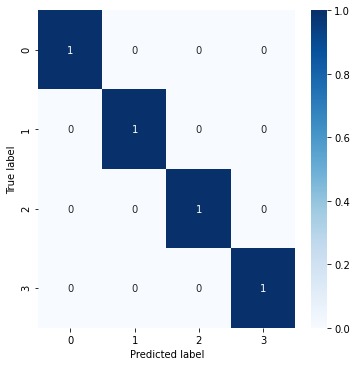

In [ ]:
model.load_weights("training_bengali_doc/cp-0100.ckpt")
n= model.predict(test_data)
n = np.argmax(n,axis=1)
print(n)
print(test_labels)
con_mat = tf.math.confusion_matrix(K.flatten(test_labels), K.flatten(n)).numpy()
classes=[0,1,2,3]
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
print(con_mat_norm.shape)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)
import seaborn as sns
figure = plt.figure(figsize=(5, 5))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

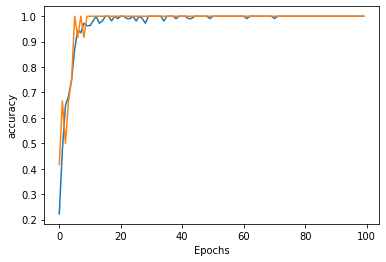

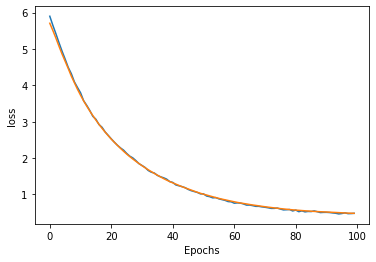

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  #plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")